# Import Modules

In [6]:
 import pandas as pd
 import numpy as np
 import io
 import matplotlib.pyplot as plt
 import seaborn as sns
 import re
 import string
 import nltk
 import warnings
 %matplotlib inline
 warnings.filterwarnings('ignore')

# Loading the Dataset

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Twitter Sentiments.csv to Twitter Sentiments (1).csv


In [9]:
df=pd.read_csv(io.BytesIO(uploaded['Twitter Sentiments.csv']))
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
#datatype info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the DataSet

In [28]:
#main function for removing the patterns like @user and so on
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [29]:
#remove twitter handles
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [30]:
#now we can see tweets without twitter handles
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [31]:
#removing the extra punctuations and symbols
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [32]:
#removing the small words which are of length less than 3
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [33]:
#tokenizing the sentences
tokenized_tweet=df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [36]:
#Stemming the tokenized words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, cau, they, offer, wheel...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [37]:
#combine words into single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=" ".join(tokenized_tweet[i])

df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

<function matplotlib.pyplot.show>

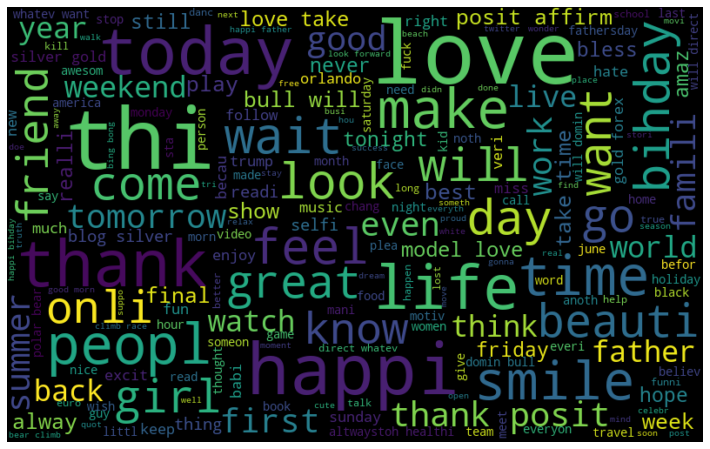

In [40]:
#visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud =WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show


<function matplotlib.pyplot.show>

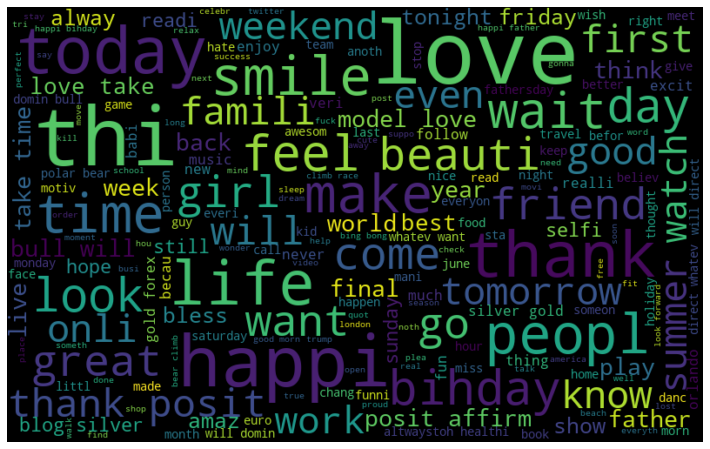

In [42]:
#frequent word visualization for positive

all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])


wordcloud =WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show


<function matplotlib.pyplot.show>

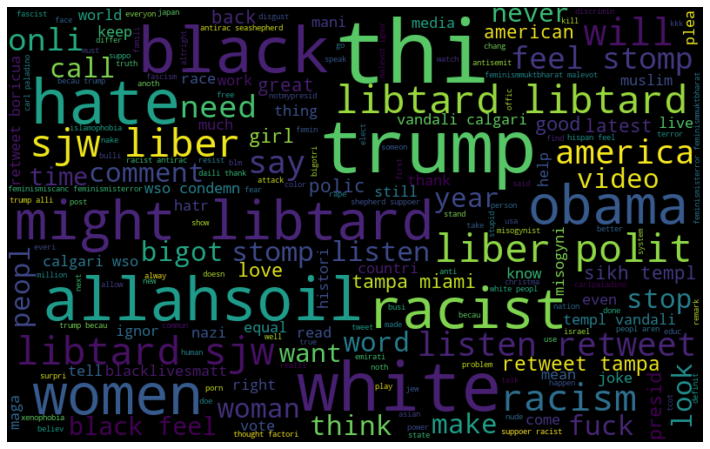

In [44]:
#for the negative words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])


wordcloud =WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

In [45]:
#extract the hashtags
def hashtag_extract(tweets):
  hashtags=[]
  for tweet in tweets:
    ht=re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags

In [48]:
#extracting positive and negative hashtags from the tweets

ht_positive=hashtag_extract(df['clean_tweet'][df['label']==0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconf', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkylif'

In [49]:
ht_negative=hashtag_extract(df['clean_tweet'][df['label']==1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejud', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prai', 'cleveland', 'rnc', 'white', 'tamirr', 'rip

In [50]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [51]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


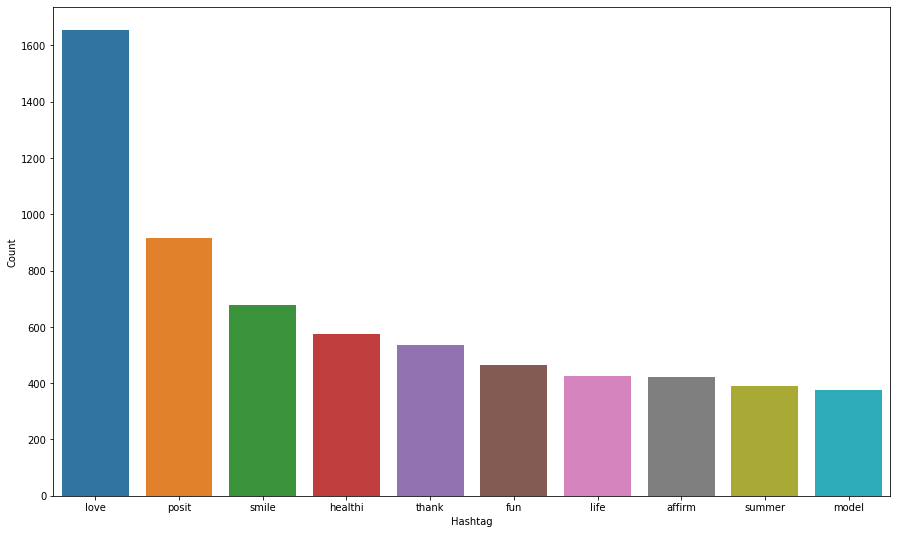

In [52]:
#select the top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [53]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


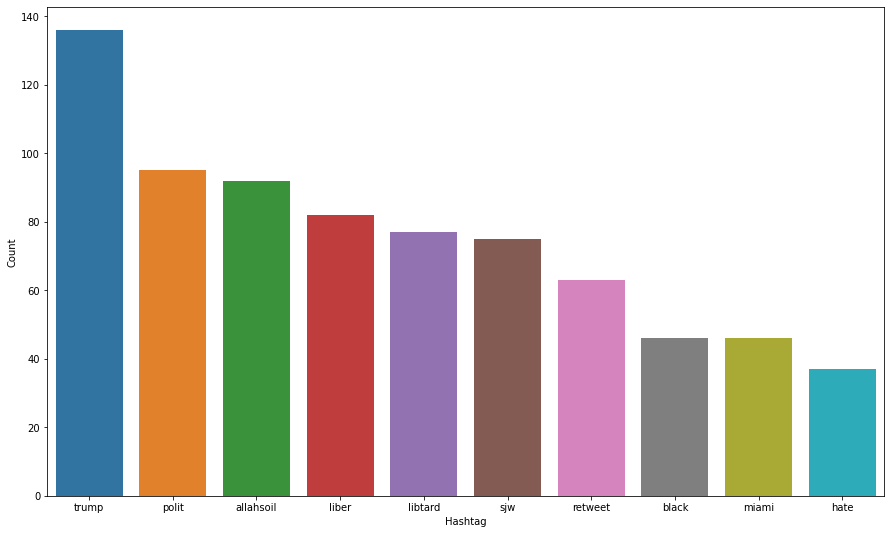

In [54]:
#select the top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

## Input Split

In [58]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [61]:
#bow[0].toarray()

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)

Model Training

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [67]:
#training

In [68]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
#testing
pred=model.predict(x_test)
f1_score(y_test,pred
         )

0.4952380952380952

In [70]:
accuracy_score(y_test,pred)

0.9469403078463271

In [71]:
#Using Probability to predict

In [74]:
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
pred=pred.astype(np.int)
f1_score(y_test,pred)


0.5579567779960707

In [75]:
accuracy_score(y_test,pred)

0.9436866474784132

In [76]:
pred_prob[0][1]

0.0010580306993620563